# Practice 

[ 0.99500417  0.70595862  0.09660425 -0.55658157 -0.9572342  -0.92356879
 -0.47086008  0.19548812  0.77313909  1.        ]


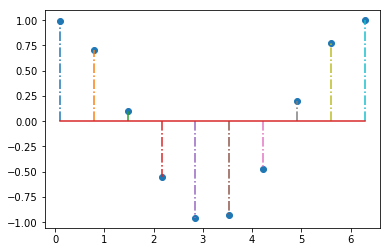

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# returns 10 evenly spaced samples from 0.1 to 2*PI
x = np.linspace(0.1, 2 * np.pi, 10)

plt.stem(x, np.cos(x), '-.')

print ( np.cos(x) )

# setting property of baseline with color red and linewidth 2
plt.setp(baseline, color='r', linewidth=2)

plt.show()

In [4]:
x = int ( input()) 
y = int ( input()) 
n = int ( input()) 
print ([ [ i, j] for i in range( x + 1) for j in range( y + 1) if ( ( i + j ) != n )])

3
4
5
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 4], [3, 0], [3, 1], [3, 3], [3, 4]]


In [26]:
[(x,y,z) for x in range(1,30) for y in range(x,30) for z in range(y,30) if x**2 + y**2 == z**2]

[(3, 4, 5),
 (5, 12, 13),
 (6, 8, 10),
 (7, 24, 25),
 (8, 15, 17),
 (9, 12, 15),
 (10, 24, 26),
 (12, 16, 20),
 (15, 20, 25),
 (20, 21, 29)]

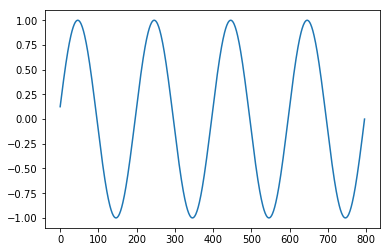

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = 50
f = 1/T
num_cycles = 4

t = np.arange(1,T*num_cycles+0.25,0.25)

# print (t)

y = np.sin(2*np.pi*f*t)

plt.plot(y)
plt.show()

In [120]:
"""
Visualize Genetic Algorithm to match the target phrase.
Visit my tutorial website for more: https://morvanzhou.github.io/tutorials/
"""
import numpy as np

TARGET_PHRASE = 'You get it!'       # target DNA
POP_SIZE = 10                      # population size
CROSS_RATE = 0.4                    # mating probability (DNA crossover)
MUTATION_RATE = 0.01                # mutation probability
N_GENERATIONS = 1000

DNA_SIZE = len(TARGET_PHRASE)
TARGET_ASCII = np.fromstring(TARGET_PHRASE, dtype=np.uint8)  # convert string to number

print ('TARGET_ASCII, ',TARGET_ASCII, '\n')

ASCII_BOUND = [32, 126]


class GA(object):
    def __init__(self, DNA_size, DNA_bound, cross_rate, mutation_rate, pop_size):
        self.DNA_size = DNA_size
        #DNA_bound[1] += 1
        self.DNA_bound = DNA_bound
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.random.randint(*DNA_bound, size=(pop_size, DNA_size)).astype(np.int8)  # int8 for convert to ASCII

    def translateDNA(self, DNA):                 # convert to readable string
        return DNA.tostring().decode('ascii')

    def get_fitness(self):                      # count how many character matches
        match_count = (self.pop == TARGET_ASCII).sum(axis=1)
#         print ('match_count: ', match_count)
        return match_count

    def select(self):
        fitness = self.get_fitness() + 1e-4     # add a small amount to avoid all zero fitness
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness/fitness.sum())
        
        print ('idx: ', idx)
        print ('self.pop[idx]: ', self.pop[idx])
        
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover points
            print (cross_points)
            parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                child[point] = np.random.randint(*self.DNA_bound)  # choose a random ASCII index
                print 
        return child

    def evolve(self):
        pop = self.select()
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            print ('child: ', child)
            child = self.mutate(child)
            
            parent[:] = child
            
        self.pop = pop

if __name__ == '__main__':
    ga = GA(DNA_size=DNA_SIZE, DNA_bound=ASCII_BOUND, cross_rate=CROSS_RATE,
            mutation_rate=MUTATION_RATE, pop_size=POP_SIZE)
    
    ########CHECK ---
    N_GENERATIONS = 2
    
    for generation in range(N_GENERATIONS):
        print ('START######################')
        fitness = ga.get_fitness()
#         print('fitness: ', fitness)
#         print('max_fit: ', np.argmax(fitness))
#         print ('ga.pop: ', ga.pop)
        best_DNA = ga.pop[np.argmax(fitness)]
        
        best_phrase = ga.translateDNA(best_DNA)
        print('Gen', generation, ': ', best_phrase)
#         print('Gen -> ASCII : ', best_DNA)
        if best_phrase == TARGET_PHRASE:
            break
        ga.evolve()
        print ('END######################\n')

TARGET_ASCII,  [ 89 111 117  32 103 101 116  32 105 116  33] 

START######################
Gen 0 :  v9u0ExbVl4t
idx:  [2 3 3 2 3 2 3 2 3 3]
self.pop[idx]:  [[118  57 117  48  69 120  98  86 108  52 116]
 [ 89  65  42  92 124  99  43  74  79  37  36]
 [ 89  65  42  92 124  99  43  74  79  37  36]
 [118  57 117  48  69 120  98  86 108  52 116]
 [ 89  65  42  92 124  99  43  74  79  37  36]
 [118  57 117  48  69 120  98  86 108  52 116]
 [ 89  65  42  92 124  99  43  74  79  37  36]
 [118  57 117  48  69 120  98  86 108  52 116]
 [ 89  65  42  92 124  99  43  74  79  37  36]
 [ 89  65  42  92 124  99  43  74  79  37  36]]
[ True False False  True False  True  True  True  True False  True]
child:  [ 89  57 117  92  69  99  43  74  79  52  36]
[ True  True  True  True  True  True  True  True  True  True  True]
child:  [ 89  65  42  92 124  99  43  74  79  37  36]
[ True False  True  True False  True  True False  True  True  True]
child:  [ 89  65  42  92 124  99  43  74  79  37  36]
[False 

In [119]:
import numpy as np
np.random.rand()
# np.random.randint(3, 12, size=1)  

print (np.random.randint(5, size=(4, 2)))

arr = ([[0, 1, 2],
       [3, 5, 4]])
arr1 = ([[5, 1, 2],
       [3, 4, 0]])
arr2 = ([[0, 1, 5],
       [3, 4, 2]])


print (np.argmax(arr))
print (np.argmax(arr1))
print (np.argmax(arr2))

print (np.random.randint(0, 2, 11).astype(np.bool))
print (np.random.randint(0, 12, size=1)  )

TARGET_PHRASE = 'You get it!'       # target DNA
POP_SIZE = 10                      # population size
CROSS_RATE = 0.4                    # mating probability (DNA crossover)
MUTATION_RATE = 0.01                # mutation probability
N_GENERATIONS = 1000

DNA_SIZE = len(TARGET_PHRASE)
# print (DNA_SIZE)

# pop = [[ 98, 112,  38,  89,  86, 105, 116,  59,  60, 115,  58],
#        [100,  72,  37,  41, 100, 121,  49, 117,  59,  60,  33],
#        [100,  72,  37,  41, 100, 121,  49, 117,  59,  60,  33],
#        [100,  72,  37,  41, 100, 121,  49, 117,  59,  60,  33],
#        [100,  72,  37,  41, 100, 121,  49, 117,  59,  60,  33],
#        [100,  72,  37,  41, 100, 121,  49, 117,  59,  60,  33],
#        [100,  72,  37,  41, 100, 121,  49, 117,  59,  60,  33],
#        [100,  72,  37,  41, 100, 121,  49, 117,  59,  60,  33],
#        [100,  72,  37,  41, 100, 121,  49, 117,  59,  60,  33],
#        [100,  72,  37,  41, 100, 121,  49, 117,  59,  60,  33]]

# TARGET_ASCII = [89, 111, 117,  32, 103, 101, 116,  32, 105, 116,  33]

# print ( (pop == TARGET_ASCII).sum(axis=1) )

print (np.random.choice(np.arange(5), 3, replace=False, p=[0.1, 0, 0.3, 0.6, 0]))


[[0 4]
 [4 0]
 [3 3]
 [0 3]]
4
0
2
[False  True  True False  True  True  True False  True False False]
[7]
[3 0 2]


In [57]:
import numpy as np

TARGET_PHRASE = 'You get it!'       # target DNA

CROSS_RATE = 0.4                    # mating probability (DNA crossover)
MUTATION_RATE = 0.01                # mutation probability
N_GENERATIONS = 1000


TARGET_ASCII = np.fromstring(TARGET_PHRASE, dtype=np.uint8)  # convert string to number

DNA_size = len(TARGET_PHRASE)
DNA_bound = [32, 126]
pop_size = 5                    # population size

populations = np.random.randint(*DNA_bound, size=(pop_size, DNA_size)).astype(np.int8)

def get_fitness(pop, TARGET_ASCII):                      # count how many character matches
    match_count = (pop == TARGET_ASCII).sum(axis=1)
    return match_count

print (populations)

index = np.argmax(populations)
print(index)

print ('The individual: ',populations[index])

print ('Terget Ascii: ',TARGET_ASCII)

print (get_fitness(populations, TARGET_ASCII))
print (get_fitness(populations, TARGET_ASCII))

[[ 62  39 100  57  35  94  79 109  69  99 118]
 [ 68  78  71 104 119 125 105 112  56  86  45]
 [ 69 125  75  32 125  93 124  98  84  39 121]
 [ 43  62  37  65  84  45 108  69  37  52  98]
 [ 75  99  77 122  49 115  43  68  55 100  67]]
16


IndexError: index 16 is out of bounds for axis 0 with size 5